# ✅ TASK 3 - Data Manipulation And Visualization 

#### Name : Almustapha Damilola Usman 

- ##### First step is to import all necessary dictionaries that will be posibly used in cleaning and doing numerical calculation 

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

- ##### Import all data to be cleaned .

In [420]:
orders = pd.read_csv("pizza_sales/orders.csv") #import orders.csv file 
orders_details = pd.read_csv("pizza_sales/order_details.csv") #import order_details.csv file
pizzas = pd.read_csv("pizza_sales/pizzas.csv") #import pizzas.csv file
pizza_types = pd.read_csv("pizza_sales/pizza_types.csv" , encoding="latin1") #import pizza_types.csv file 

- #####  Explore each datasets 

In [429]:
orders #output orders data

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [431]:
orders.head() #output first 5 rows

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [433]:
orders.tail() #output last 5 rows

,order_id,date,time
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54
21349,21350,2015-12-31,23:02:05


In [435]:
orders.shape #output the total rows and columns

(21350, 3)

In [28]:
orders.columns

Index(['order_id', 'date', 'time'], dtype='object')

In [437]:
orders.info() #shows the full overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [439]:
orders.isna().sum() #check for null values 

order_id    0
date        0
time        0
dtype: int64

In [441]:
#convert the date and time column to datetime dtype
orders["date"] = pd.to_datetime(orders["date"]) 
orders["time"] = pd.to_datetime(orders["time"], format='%H:%M:%S')

In [243]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     21350 non-null  int64         
 1   date         21350 non-null  datetime64[ns]
 2   time         21350 non-null  datetime64[ns]
 3   Order month  21350 non-null  object        
 4   Order day    21350 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 834.1+ KB


In [124]:
orders.value_counts()

order_id  date        time      Order month  Order day
1         2015-01-01  11:38:36  January      Thursday     1
14241     2015-08-26  13:49:24  August       Wednesday    1
14239     2015-08-26  13:12:31  August       Wednesday    1
14238     2015-08-26  12:51:01  August       Wednesday    1
14237     2015-08-26  12:46:25  August       Wednesday    1
                                                         ..
7116      2015-04-30  12:40:05  April        Thursday     1
7115      2015-04-30  12:37:50  April        Thursday     1
7114      2015-04-30  12:34:20  April        Thursday     1
7113      2015-04-30  12:21:01  April        Thursday     1
21350     2015-12-31  23:02:05  December     Thursday     1
Name: count, Length: 21350, dtype: int64

In [245]:
orders["Order month"] = orders["date"].dt.strftime('%B') # add a column for month

In [443]:
orders["Order day"] = orders["date"].dt.day_name() #add a column for day 

In [445]:
orders.head() #check the updates made on the dataset

,order_id,date,time,Order day
0,1,2015-01-01,1900-01-01 11:38:36,Thursday
1,2,2015-01-01,1900-01-01 11:57:40,Thursday
2,3,2015-01-01,1900-01-01 12:12:28,Thursday
3,4,2015-01-01,1900-01-01 12:16:31,Thursday
4,5,2015-01-01,1900-01-01 12:21:30,Thursday


- The same process is followed for the other datasets

In [251]:
orders_details

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [253]:
orders_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [255]:
orders_details.tail()

,order_details_id,order_id,pizza_id,quantity
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1
48619,48620,21350,bbq_ckn_s,1


In [257]:
orders_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [259]:
orders_details["pizza_id"].unique()

array(['hawaiian_m', 'classic_dlx_m', 'five_cheese_l', 'ital_supr_l',
       'mexicana_m', 'thai_ckn_l', 'ital_supr_m', 'prsc_argla_l',
       'bbq_ckn_s', 'the_greek_s', 'spinach_supr_s', 'classic_dlx_s',
       'green_garden_s', 'ital_cpcllo_l', 'ital_supr_s', 'mexicana_s',
       'spicy_ital_l', 'spin_pesto_l', 'veggie_veg_s', 'mexicana_l',
       'southw_ckn_l', 'bbq_ckn_l', 'cali_ckn_l', 'cali_ckn_m',
       'pepperoni_l', 'cali_ckn_s', 'ckn_pesto_l', 'big_meat_s',
       'soppressata_l', 'four_cheese_l', 'napolitana_s', 'calabrese_m',
       'four_cheese_m', 'ital_veggie_s', 'mediterraneo_m',
       'peppr_salami_s', 'spinach_fet_l', 'napolitana_l', 'sicilian_l',
       'ital_cpcllo_m', 'southw_ckn_s', 'bbq_ckn_m', 'pepperoni_m',
       'prsc_argla_s', 'sicilian_m', 'veggie_veg_l', 'ckn_alfredo_s',
       'pepperoni_s', 'green_garden_l', 'green_garden_m', 'pep_msh_pep_l',
       'hawaiian_s', 'peppr_salami_m', 'ckn_alfredo_m', 'peppr_salami_l',
       'spin_pesto_s', 'thai_ckn_m'

In [261]:
orders_details.value_counts()

order_details_id  order_id  pizza_id       quantity
1                 1         hawaiian_m     1           1
32418             14326     bbq_ckn_m      1           1
32409             14322     spicy_ital_s   1           1
32410             14323     pepperoni_s    1           1
32411             14323     thai_ckn_l     1           1
                                                      ..
16209             7132      classic_dlx_m  1           1
16210             7132      four_cheese_l  1           1
16211             7132      spicy_ital_l   1           1
16212             7133      mexicana_s     1           1
48620             21350     bbq_ckn_s      1           1
Name: count, Length: 48620, dtype: int64

In [263]:
pizzas

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [265]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [267]:
pizzas.tail()

,pizza_id,pizza_type_id,size,price
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00
95,veggie_veg_l,veggie_veg,L,20.25


In [269]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [271]:
pizzas.value_counts()

pizza_id        pizza_type_id  size  price
bbq_ckn_l       bbq_ckn        L     20.75    1
bbq_ckn_m       bbq_ckn        M     16.75    1
southw_ckn_l    southw_ckn     L     20.75    1
soppressata_s   soppressata    S     12.50    1
soppressata_m   soppressata    M     16.50    1
                                             ..
green_garden_m  green_garden   M     16.00    1
green_garden_l  green_garden   L     20.25    1
four_cheese_s   four_cheese    S     11.75    1
four_cheese_m   four_cheese    M     14.75    1
veggie_veg_s    veggie_veg     S     12.00    1
Name: count, Length: 96, dtype: int64

In [273]:
pizza_types

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [275]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [277]:
pizza_types.tail()

,pizza_type_id,name,category,ingredients
27,mediterraneo,The Mediterranean Pizza,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie..."
28,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
29,spin_pesto,The Spinach Pesto Pizza,Veggie,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat..."
30,spinach_fet,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
31,veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


In [279]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [281]:
pizza_types.value_counts()

pizza_type_id  name                                        category  ingredients                                                                                      
bbq_ckn        The Barbecue Chicken Pizza                  Chicken   Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  1
big_meat       The Big Meat Pizza                          Classic   Bacon, Pepperoni, Italian Sausage, Chorizo Sausage                                                   1
the_greek      The Greek Pizza                             Classic   Kalamata Olives, Feta Cheese, Tomatoes, Garlic, Beef Chuck Roast, Red Onions                         1
thai_ckn       The Thai Chicken Pizza                      Chicken   Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   1
spinach_supr   The Spinach Supreme Pizza                   Supreme   Spinach, Red Onions, Pepperoni, Tomatoes, Artichokes, Kalamata Olives, Garli

In [283]:
pizza_types["category"].value_counts()

category
Supreme    9
Veggie     9
Classic    8
Chicken    6
Name: count, dtype: int64

In [285]:
pizza_types["name"].value_counts()

name
The Barbecue Chicken Pizza                    1
The California Chicken Pizza                  1
The Spinach and Feta Pizza                    1
The Spinach Pesto Pizza                       1
The Mexicana Pizza                            1
The Mediterranean Pizza                       1
The Italian Vegetables Pizza                  1
The Green Garden Pizza                        1
The Four Cheese Pizza                         1
The Five Cheese Pizza                         1
The Spinach Supreme Pizza                     1
The Spicy Italian Pizza                       1
The Soppressata Pizza                         1
The Sicilian Pizza                            1
The Prosciutto and Arugula Pizza              1
The Pepper Salami Pizza                       1
The Italian Supreme Pizza                     1
The Calabrese Pizza                           1
The Brie Carre Pizza                          1
The Greek Pizza                               1
The Pepperoni Pizza                

In [287]:
pizza_types["ingredients"].value_counts()

ingredients
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  1
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  1
Spinach, Mushrooms, Red Onions, Feta Cheese, Garlic                                                  1
Spinach, Artichokes, Tomatoes, Sun-dried Tomatoes, Garlic, Pesto Sauce                               1
Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic          1
Spinach, Artichokes, Kalamata Olives, Sun-dried Tomatoes, Feta Cheese, Plum Tomatoes, Red Onions     1
Eggplant, Artichokes, Tomatoes, Zucchini, Red Peppers, Garlic, Pesto Sauce                           1
Spinach, Mushrooms, Tomatoes, Green Olives, Feta Cheese                                              1
Ricotta Cheese, Gorgonzola Piccante Cheese, Mozzarella Cheese, Parmigiano Reggiano Cheese, Garlic    1
Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Rom

In [289]:
pizza_types.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool

In [291]:
orders.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21345    False
21346    False
21347    False
21348    False
21349    False
Length: 21350, dtype: bool

In [293]:
orders_details.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48615    False
48616    False
48617    False
48618    False
48619    False
Length: 48620, dtype: bool

In [295]:
pizzas.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
91    False
92    False
93    False
94    False
95    False
Length: 96, dtype: bool

- ##### Merge the Datasets

- Merging order, pizza, and pizza type data to create a comprehensive dataset for analysis.

In [451]:
merged_data = (pd.merge(orders_details, orders, on='order_id')
             .merge(pizzas, on='pizza_id')
             .merge(pizza_types, on='pizza_type_id')) #all data are merged as one 

In [453]:
merged_data #merged data

,order_details_id,order_id,pizza_id,quantity,date,time,Order day,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,Thursday,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,Thursday,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,Thursday,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,Thursday,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,Thursday,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10,Thursday,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10,Thursday,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10,Thursday,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54,Thursday,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [455]:
merged_data.info() #overview of the merged data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
 6   Order day         48620 non-null  object        
 7   pizza_type_id     48620 non-null  object        
 8   size              48620 non-null  object        
 9   price             48620 non-null  float64       
 10  name              48620 non-null  object        
 11  category          48620 non-null  object        
 12  ingredients       48620 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(7)
memory usage: 4.8+ MB


- ##### All data have been merged and ready to work with

In [459]:
merged_data["Total_price"] = merged_data["price"] * merged_data["quantity"] #creates a total price column

In [307]:
merged_data.head()

,order_details_id,order_id,pizza_id,quantity,date,time,Order month,Order day,pizza_type_id,size,price,name,category,ingredients,Total_price
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,January,Thursday,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,January,Thursday,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,January,Thursday,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,January,Thursday,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,January,Thursday,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [327]:
merged_data.tail()

,order_details_id,order_id,pizza_id,quantity,date,time,Order month,Order day,pizza_type_id,size,price,name,category,ingredients,Total_price
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10,December,Thursday,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",16.75
48616,48617,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10,December,Thursday,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",17.95
48617,48618,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10,December,Thursday,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",12.00
48618,48619,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54,December,Thursday,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",20.25
48619,48620,21350,bbq_ckn_s,1,2015-12-31,1900-01-01 23:02:05,December,Thursday,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",12.75


#### 🎯 Answers To The Task Question.

#### 🔹 Total Revenue

In [465]:
total_revenue = merged_data["Total_price"].sum() #calculates the total revenue
print(f'The total revenue is : ${total_revenue}')

The total revenue is : $817860.05


#### 🔹 Total Quantity Sold

In [477]:
total_quantity_sold = merged_data["quantity"].sum() #calculates total quantity sold
print(f'The total quantity sold is :{total_quantity_sold} unit')

The total quantity sold is :49574 unit


#### 🔹 Total Orders

In [335]:
total_orders = orders['order_id'].nunique() #numbers of total orders
print(f'The total orders are : {total_orders} unit')

The total orders are : 21350 unit


#### 🔹 Number of Pizza Types

In [337]:
pizza_type_count = pizza_types['pizza_type_id'].nunique() # number of pizza types 
print(f'The nunmber of pizza types are :{pizza_type_count}')

The nunmber of pizza types are :32


#### 🔹 Average Pizza Price

In [343]:
avg_price = pizzas['price'].mean() # average pizza price
print(f'The avaerage pizza price is : {avg_price:.2f}')

The avaerage pizza price is : 16.44


#### 🔹 Peak Hours of Sales

In [353]:
merged_data['hour'] = pd.to_datetime(merged_data['time'], format='%H:%M:%S').dt.hour
peak_hours = merged_data.groupby('hour')['Total_price'].sum().sort_values(ascending=False) # ouput the total price per hours
print(f'The peak hours of sell is : {peak_hours}')

The peak hours of sell is : hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
16     70055.40
14     59201.40
20     58215.40
15     52992.30
11     44935.80
21     42029.80
22     22815.15
23      1121.35
10       303.65
9         83.00
Name: Total_price, dtype: float64


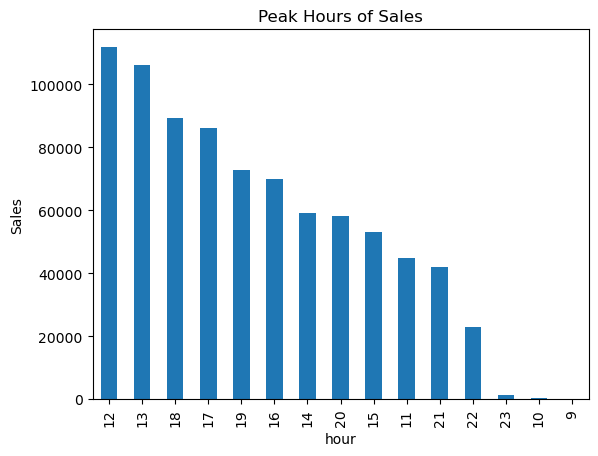

In [367]:
peak_hours.plot(kind='bar', title='Peak Hours of Sales')
plt.ylabel('Sales')
plt.show()

 #### 📊Insight
- From the bar chart we realise the hour with the most sales is 12 Noon , that is in the afternoon.
- This period has the highest peak hours because many people and companies will be ordering for lunch.
- It is adviseable to produce more pizzas before the peak time to meet the volume order of the day.
- The time with the least order volumes are 23:00 PM, 10:00 AM and 9:00 AM , this is likely due to sleeping hours and perhaps early working time.

#### 🔹 Sales by Day of the Week

In [359]:
merged_data['weekday'] = merged_data['date'].dt.day_name()
sales_per_day = merged_data.groupby('weekday')['Total_price'].sum().sort_values(ascending=False) # tatal sales per day
print(f'The sales per days of the is :{sales_per_day}')

The sales by days of the is :weekday
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: Total_price, dtype: float64


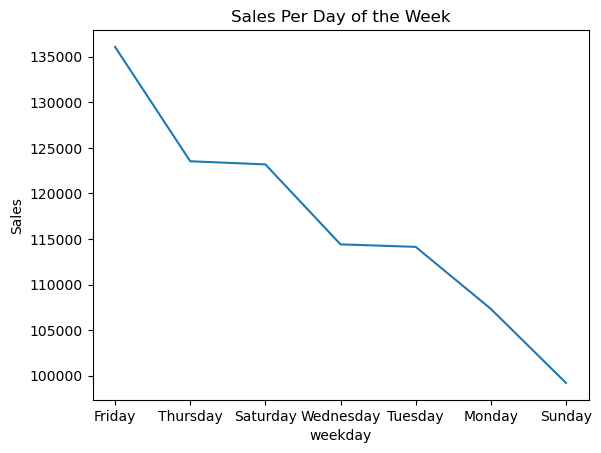

In [379]:
sales_per_day.plot(kind='line', title='Sales Per Day of the Week')
plt.ylabel('Sales')
plt.show()

 #### 📊Insight
- Friday has the highest sales per week.
- Sundays has the lowest sales per week.

#### 🔹 Top 5 Bestselling Pizzas

In [361]:
top_5_pizzas = merged_data.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False).head(5) # top selling pizzas
print(f'The top 5 best selling pizzas are :{top_5_pizzas}')

The top 5 best selling pizzas are :pizza_id
big_meat_s       1914
thai_ckn_l       1410
five_cheese_l    1409
four_cheese_l    1316
classic_dlx_m    1181
Name: quantity, dtype: int64


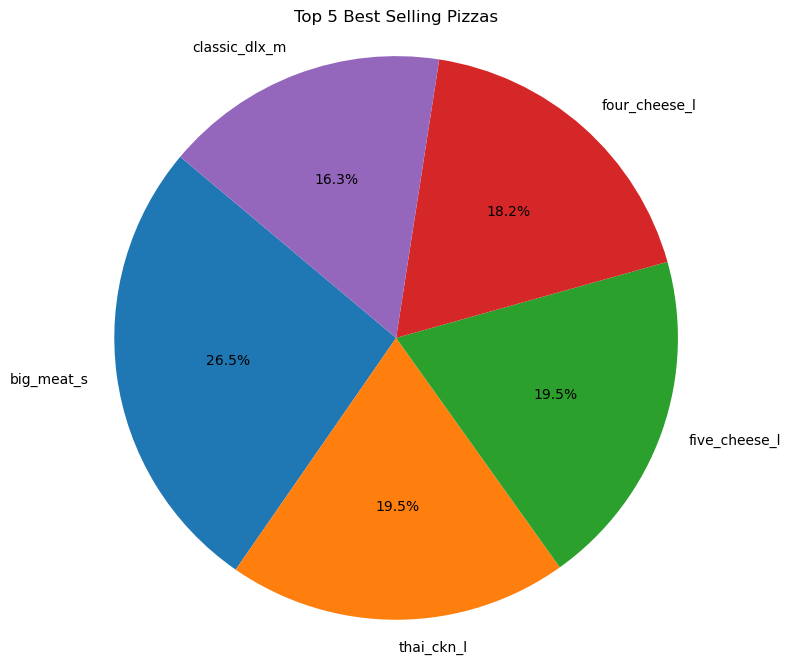

In [381]:
labels = ['big_meat_s', 'thai_ckn_l', 'five_cheese_l' ,'four_cheese_l' ,'classic_dlx_m']
sizes =[1914, 1410, 1409, 1316, 1181]
# Create a pie chart with percentages
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Best Selling Pizzas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### 📊Insight
- The top 5 best selling pizzas are illustrated on the pie chart with their domiminance percentage.
- Big_meat_s and thai_cnk_I being the best selling pizzas.
- More of these pizzas should be made to increase the total revenue and make more profits


#### 🔹 Sales by Month (Trend)

In [363]:
merged_data['month'] = merged_data['date'].dt.month_name()
monthly_sales = merged_data.groupby('month')['Total_price'].sum().sort_values() # total sales per months
print(f'The sales by month is :{monthly_sales}')

The sales by month is :month
October      64027.60
September    64180.05
December     64701.15
February     65159.60
June         68230.20
August       68278.25
April        68736.80
January      69793.30
November     70395.35
March        70397.10
May          71402.75
July         72557.90
Name: Total_price, dtype: float64


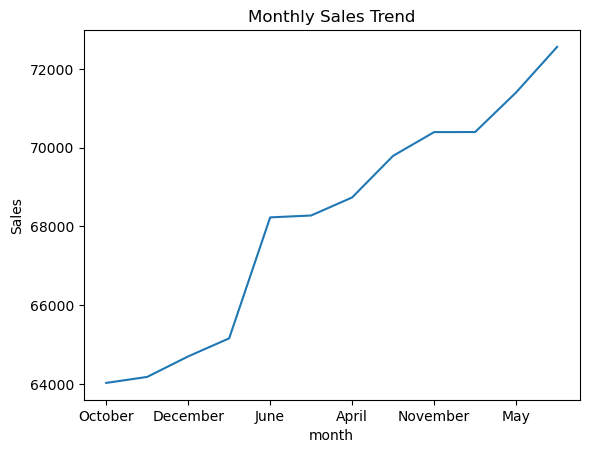

In [385]:
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.show()

 #### 📊Insight
 - July and May have the highest monthly sales return.
 - The monthly return trends indicates that profits are being made subsequently.
 - Focus more on producing the best selling pizzas to increase monthly sales .

#### 🔹 Underperforming Pizza Types

In [391]:
least_selling_pizza = merged_data.groupby('pizza_type_id')['quantity'].sum().sort_values().head(5) # least selling pizzas types
print("Underperforming Pizza Types:\n", least_selling_pizza)

Underperforming Pizza Types:
 pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
Name: quantity, dtype: int64


#### 📊Insight
- The amount of least selling pizzas should be reduced in production.
- To boost the awareness of least selling pizzas, advertisement should be put into place.

## 📊 Additional Visualization Insight.

### 🔍  Most Popular Pizza Size

<Axes: title={'center': 'Most Popular Pizza Sizes'}, xlabel='size'>

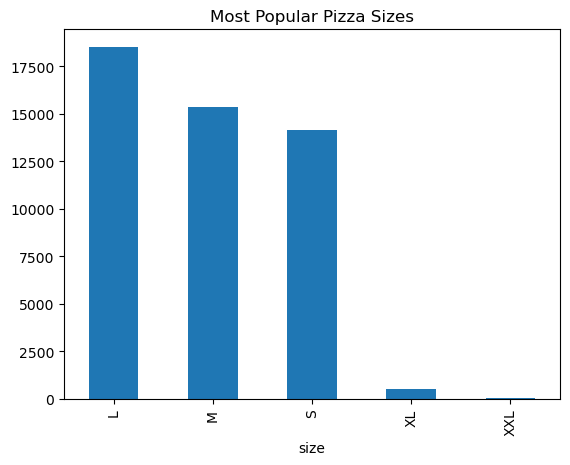

In [393]:
merged_data['size'].value_counts().plot(kind='bar', title='Most Popular Pizza Sizes')

#### 📊Insight
- More large pizzas should be produced.
- increase in production of large and medium size pizzas can likely lead to increase in revenue and sales return.

### 🔍  Revenue by Pizza Category

<Axes: title={'center': 'Revenue by Pizza Category'}, xlabel='category'>

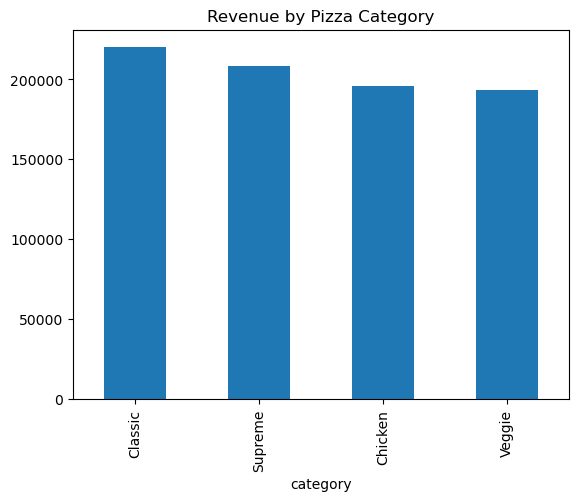

In [400]:
merged_data.groupby('category')['Total_price'].sum().sort_values(ascending=False).plot(kind='bar', title='Revenue by Pizza Category')

#### 📊Insight
- All pizza category genenrates good revenues , the categorical production should be maintained.
- Adding new category may likely lead to low sale in such category.

### 🔍 Heatmap of Sales by Day and Hour

Text(0.5, 1.0, 'Heatmap: Sales by Day and Hour')

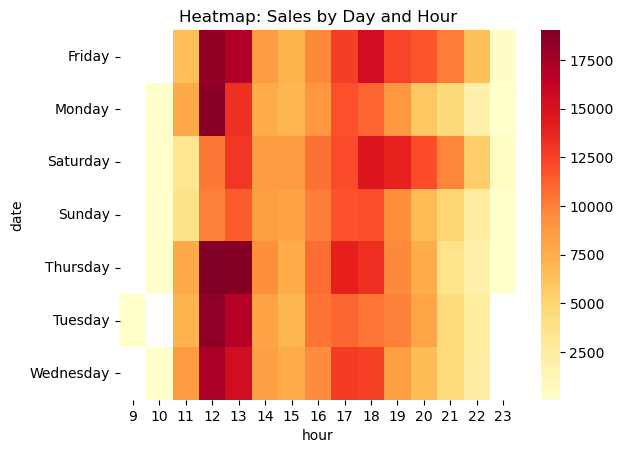

In [405]:
heatmap_data = merged_data.groupby([merged_data['date'].dt.day_name(), merged_data['hour']])['Total_price'].sum().unstack()
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title("Heatmap: Sales by Day and Hour")

#### 📊Insight
- Most active order periods are 12-13 PM, 17-18 PM,
- Most active days are Friday and Saturdays with over 10000-17500 orders. 

### 🔍 Pizza Type vs Total Revenue

<Axes: title={'center': 'Top Pizza Types by Revenue'}, ylabel='pizza_type_id'>

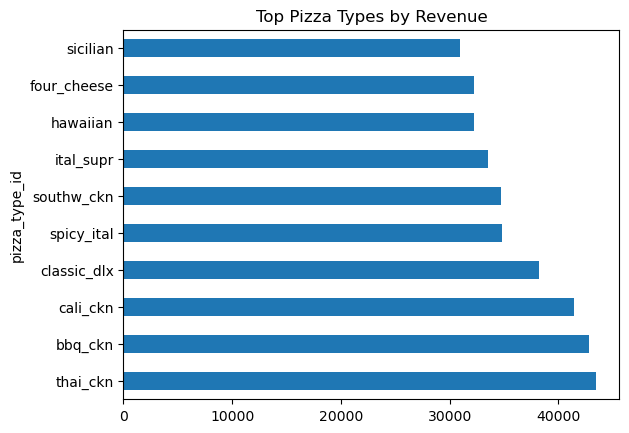

In [410]:
merged_data.groupby('pizza_type_id')['Total_price'].sum().sort_values(ascending=False).head(10).plot(kind='barh', title='Top Pizza Types by Revenue')

#### 📊Insight
- thai_ckn , bbq_cnk and cali_cnk generates more revenue of over $40000
- The production of the above types should be taken into consideration.

## 📊 Overall Insight

- More production of Pizzas that genenrate High revenue return.
- Production for active hours and days should be considered to increase more in revenue.
- Maintain present pizzas category.
- Large and medium size pizzas should be produced more .
- Folowing all insights logicallly will lead to increase in profit.


## 🎯🎯 Task Completed !!.
- Data Cleaned.✔️ 
- Ananlysis Well Approached.✔️ 
- Visualization clearly displaywd.✔️ 